In [8]:
import tensorflow as tf
import numpy as np

## Loading data

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale=1.0/255)

In [10]:
# directory
imgdir = 'a5_images'
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.


In [11]:
Xbatch, Ybatch = train_generator.next()

In [12]:
Xbatch.shape

(32, 64, 64, 3)

In [13]:
Ybatch[4]

1.0

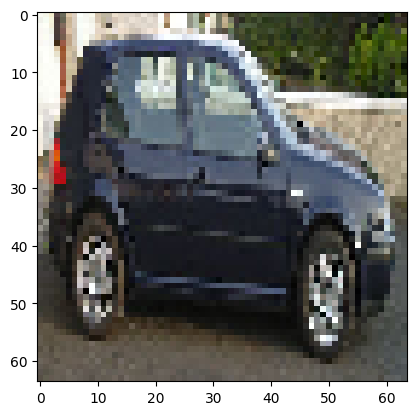

In [14]:
from matplotlib import pyplot as plt

plt.imshow(Xbatch[4]);

In [46]:
validation_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 576 images belonging to 2 classes.


## Part 1: Training a convolutional neural network

In [56]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 flatten_7 (Flatten)         (None, 9216)             

In [58]:
nb_epochs = 15

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

Epoch 1/15


C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_20320\3331051316.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
C:\Users\CYTech Student\.virtualenvs\IA\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 [==============================] - 9s 159ms/step - loss: 0.6877 - accuracy: 0.6050 - val_loss: 0.6254 - val_accuracy: 0.6944
Epoch 2/15
50/50 [==============================] - 7s 139ms/step - loss: 0.5880 - accuracy: 0.6994 - val_loss: 0.5467 - val_accuracy: 0.7500
Epoch 3/15
50/50 [==============================] - 7s 143ms/step - loss: 0.4949 - accuracy: 0.7575 - val_loss: 0.5247 - val_accuracy: 0.7726
Epoch 4/15
50/50 [==============================] - 8s 150ms/step - loss: 0.4570 - accuracy: 0.7937 - val_loss: 0.5271 - val_accuracy: 0.7535
Epoch 5/15
50/50 [==============================] - 7s 146ms/step - loss: 0.4166 - accuracy: 0.8081 - val_loss: 0.5454 - val_accuracy: 0.7587
Epoch 6/15
50/50 [==============================] - 7s 145ms/step - loss: 0.3836 - accuracy: 0.8263 - val_loss: 0.5264 - val_accuracy: 0.7795
Epoch 7/15
50/50 [==============================] - 7s 148ms/step - loss: 0.3591 - accuracy: 0.8475 - val_loss: 0.5093 - val_accuracy: 0.7865
Epoch 8/15
50/50 

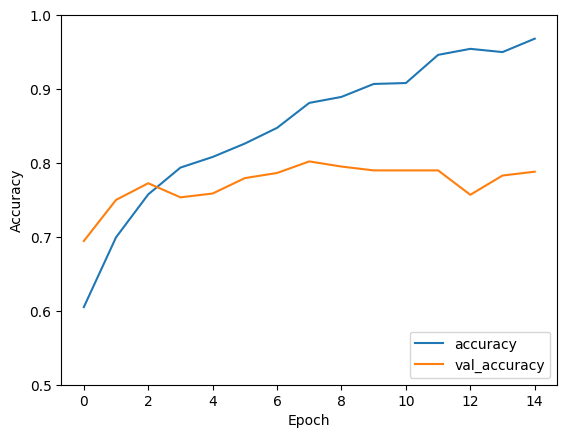

In [59]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Part 2: Data augmentation

## Applying a pre-trained convolutional neural network

In [15]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

553467096/553467096 [==============================] - 49s 0us/step


## Part 3: Using VGG-16 as a feature extractor

In [16]:
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))

58889256/58889256 [==============================] - 5s 0us/step


In [ ]:
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
def create_vgg16_features():

In [17]:
def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))

## Part 4: Visualizing the learned features

In [18]:
first_layer_weights = vggmodel.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

In [19]:
def kernel_image(weights, i, positive):

    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k

    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m

    return k

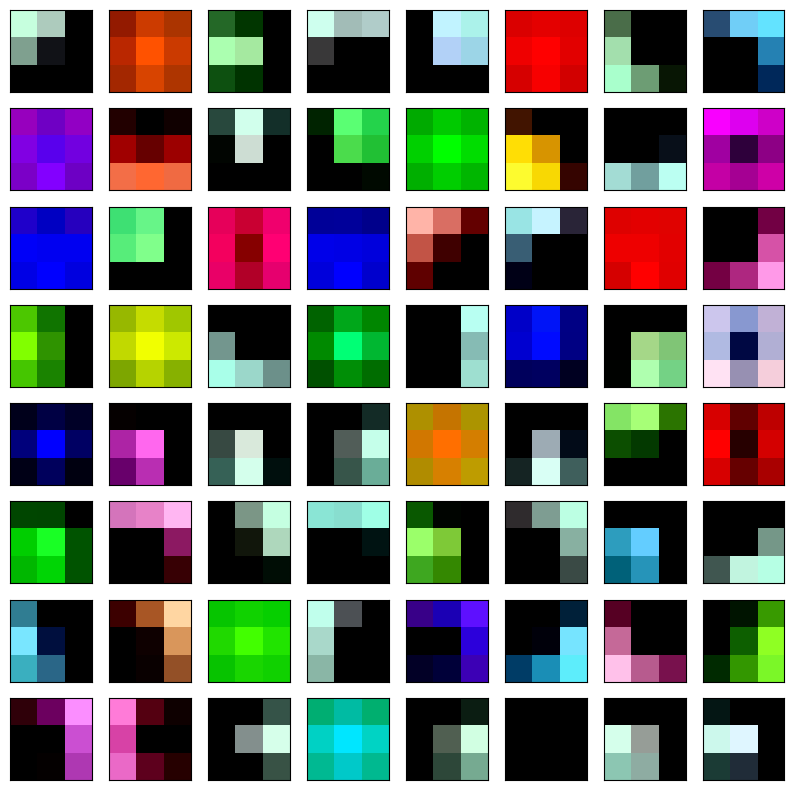

In [36]:
plt.figure(figsize=(10,10))
for i in range(first_layer_weights.shape[3]):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(kernel_image(first_layer_weights, i, True))
plt.show()